In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


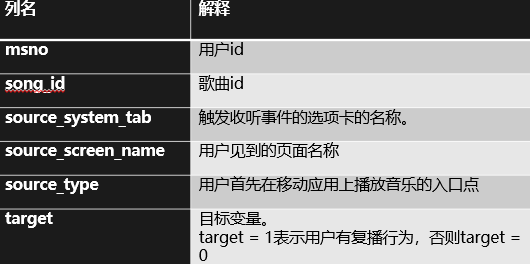

In [4]:
print('train file shape:', train.shape)

train file shape: (7377418, 6)


## 2. 计算训练集基本统计量 

In [5]:
user_play=train.groupby('msno').agg(song_count=('song_id', pd.Series.nunique))
song_play=train.groupby('song_id').agg(user_count=('msno', pd.Series.nunique))

In [6]:
print('训练集用户数', user_play.shape[0])
print('训练集歌曲数', song_play.shape[0])

print('用户播放歌曲数平均值', user_play.mean()[0])
print('用户播放歌曲数中位值', user_play.median()[0])
print('用户播放歌曲数最大值', user_play.max()[0])
print('歌曲被播放用户数平均数', song_play.mean()[0])
print('歌曲被播放用户数中位值', song_play.median()[0])
print('歌曲被播放用户数最大值', song_play.max()[0])

训练集用户数 30755
训练集歌曲数 359966
用户播放歌曲数平均值 239.87702812550805
用户播放歌曲数中位值 128.0
用户播放歌曲数最大值 5819
歌曲被播放用户数平均数 20.494763394320575
歌曲被播放用户数中位值 2.0
歌曲被播放用户数最大值 13973


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A5962BB0>]],
      dtype=object)

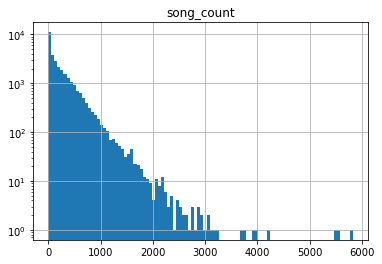

In [7]:
user_play.hist(bins=100, log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A5CD0BB0>]],
      dtype=object)

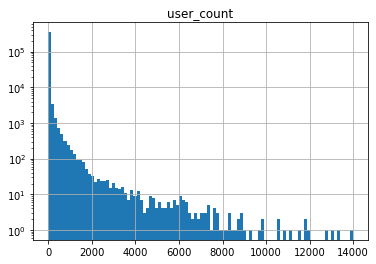

In [8]:
song_play.hist(bins=100, log=True)

## 3. 统计样本分布

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A5E1E370>],
      dtype=object)

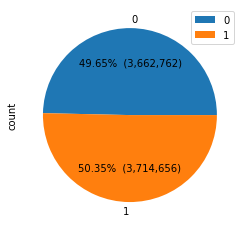

In [9]:
target_count = train.groupby(['target']).agg(count=('msno', 'count'))
target_count.plot.pie(subplots=True, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * target_count.sum()[0]/100))

In [10]:
pd.__version__### 1.2版本以下没有dropna

'1.3.5'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A5E4E880>,
      dtype=object)

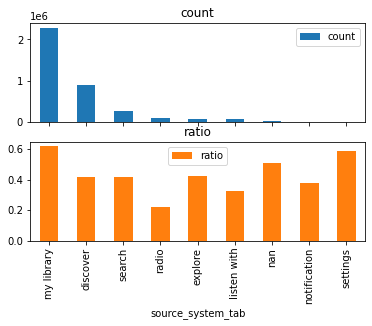

In [11]:
train.groupby(['source_system_tab'], dropna=False)['target'].agg(count='sum', ratio='mean').sort_values(by='count', ascending=False).plot.bar(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A5E65B80>,
      dtype=object)

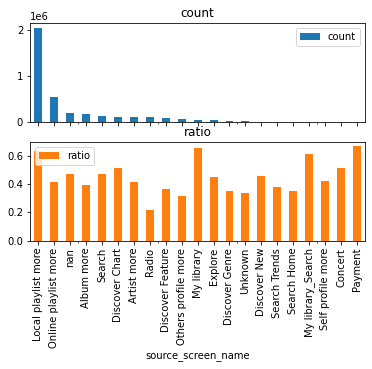

In [12]:
train.groupby(['source_screen_name'], dropna=False)['target'].agg(count='sum', ratio='mean').sort_values(by='count', ascending=False).plot.bar(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A60CA850>,
      dtype=object)

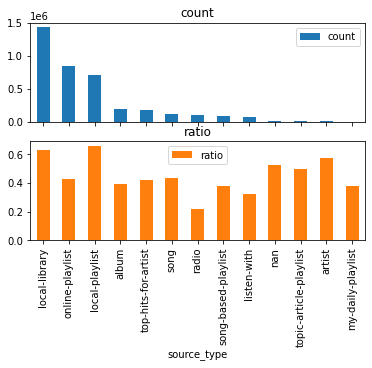

In [13]:
train.groupby(['source_type'], dropna=False)['target'].agg(count='sum', ratio='mean').sort_values(by='count', ascending=False).plot.bar(subplots=True)

## 4. 统计用户特征分布

In [14]:
members = pd.read_csv('data/members.csv')

In [15]:
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A621B5B0>],
      dtype=object)

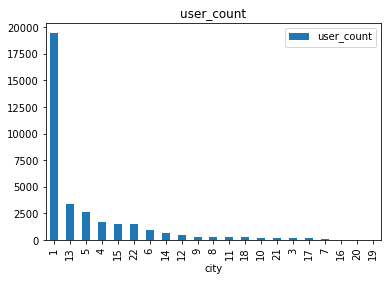

In [16]:
# 城市分布
members.groupby(['city'], dropna=False)['msno'].agg(user_count='size').sort_values(by='user_count', ascending=False).plot.bar(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A6A88CD0>],
      dtype=object)

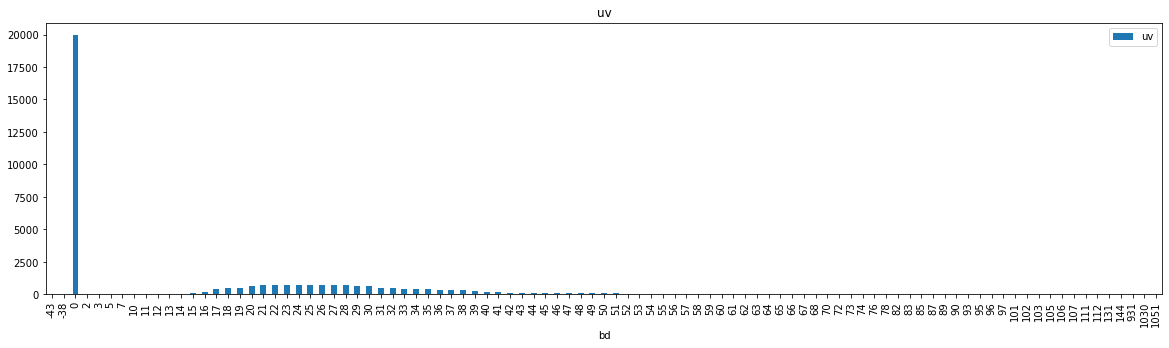

In [17]:
# 年龄特征分布
members.groupby(['bd'], dropna=False)['msno'].agg(uv='size').sort_values(by='bd', ascending=True).plot.bar(subplots=True, figsize=(20, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292A5DE5550>],
      dtype=object)

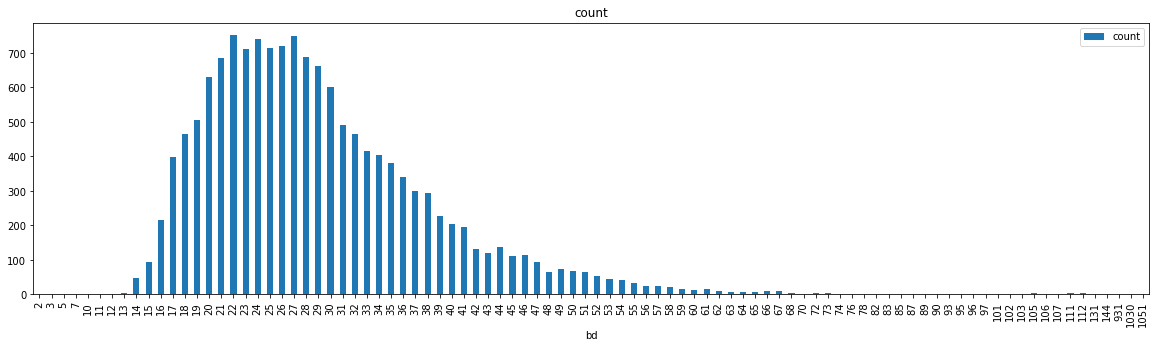

In [18]:
# 去掉年龄小于1后的分布
members[members['bd']>0].groupby(['bd'], dropna=False)['msno'].agg(count='count').sort_values(by='bd', ascending=True).plot.bar(subplots=True, figsize=(20, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292AAA39190>],
      dtype=object)

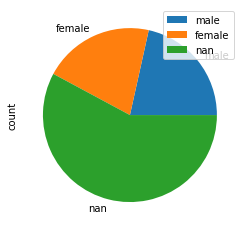

In [19]:
#性别分布
members.groupby(['gender'], dropna=False)['msno'].agg(count='count').sort_values(by='gender', ascending=False).plot.pie(subplots=True)